<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical

In [91]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
#(60000, 28, 28), (60000), (10000,28,28)

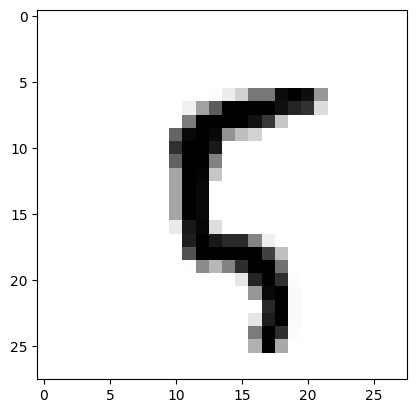

So nay la: 5


In [92]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("So nay la:", train_labels[100])

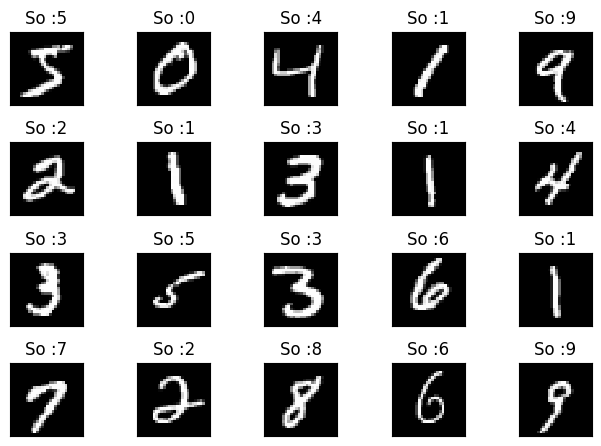

In [94]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [95]:

model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape= (28*28,))) #Gia tri toi uu
model.add(Dense(10, activation= 'softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [96]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

In [97]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [98]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [99]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 256)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.9064
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1406 - accuracy: 0.9594
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9734
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9844
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9880
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0332 - accuracy: 0.9911
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9926
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9947
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.9961

In [100]:
model.save('MINIST.h5')

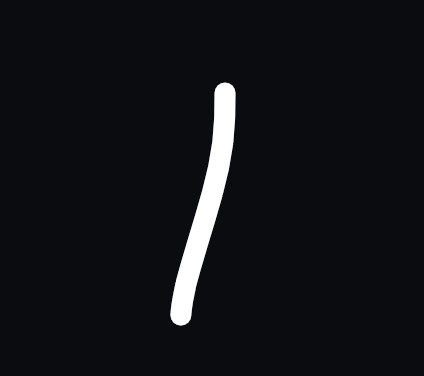

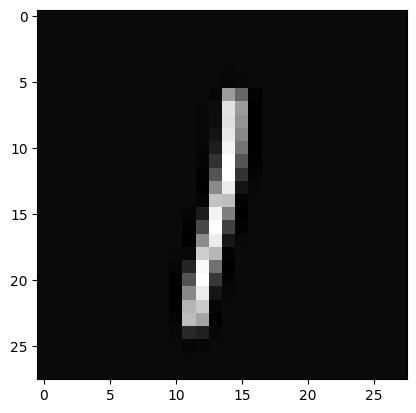

1/1 [==============================] - 0s 55ms/step
Predicted digit: 1


In [109]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display

#Load model
model = load_model('MINIST.h5')

#Open image uploaded 
img = Image.open('1.jpg')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 28x28 image
img = img.resize((28,28))

#Show image
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()

#Convert image to numpy array
img = np.array(img)

#Reshape array to Vector(1, 28*28)
img = img.reshape(1,28*28)

#Rescale pixel value from (0, 255) to (0, 1)
img = img.astype('float32') / 255

#Prediction and displaying the result on the screen
predictions = model.predict(img)
digit = np.argmax(predictions)
print('Predicted digit:', digit)
